# [Mosaic on face automatically.]

###  1. Download the face detection cascade file.

In [1]:
import urllib.request as req
import pandas as pd

# Download file.
url = "https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml"
savefile = "haarcascade_frontalface_alt.xml"
req.urlretrieve(url, savefile)
print("Saved.")


Saved.


###  2. Procedure for face detection.
   - Create a detector by specifying a cascade file.
   - Read the target image and convert it to grayscale.
       <BR>※The image is converted to grayscale to use the image brightness information for face detection.
   - Perform face detection.

Face coordinates =  145 123 316 316


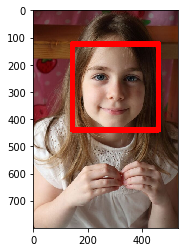

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
#!
#! Create a detector by specifying a cascade file.
#!
cascade_file = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(cascade_file)

#!
#!Read the target image and convert it to grayscale.
#!
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#! Perform face recognition.
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

#! Check the result.
if len(face_list) == 0:
    print("Faild.")
    quit()
    
#! Mark the recognized part.
for (x, y, w, h) in face_list:
    print("Face coordinates = ", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x + w, y + h), red, thickness = 20)

#! Output image.
cv2.imwrite("face-detect.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

###  3. Mosaic with OpenCV.
   - To perform a mosaic, the image is reduced once and enlarged to form a mosaic.

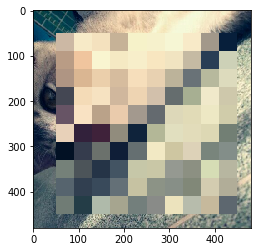

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
# Mosaic module created.(mosaic.py)
from mosaic3 import mosaic as mosaic

#!
#! Load the image and apply the mosaic.
#!
img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

#! Output mosaiced image.
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()


###  4. Automatically mosaic people's faces.

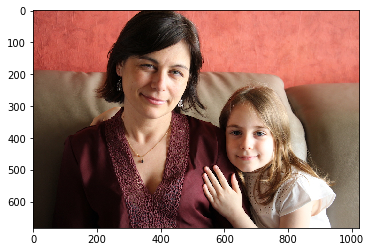

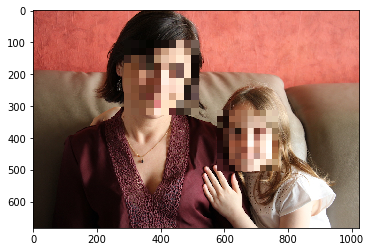

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
# Mosaic module created.(mosaic.py)
from mosaic3 import mosaic as mosaic

#!
#! Create a detector by specifying a cascade file.
#!
cascade_file = "haarcascade_frontalface_alt2.xml"
cascade = cv2.CascadeClassifier(cascade_file)

#!
#!Read the target image and convert it to grayscale.
#!
img = cv2.imread("family.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#! Perform face recognition.
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

#! Check the result.
if len(face_list) == 0:
    print("Faild.")
    quit()
    
#! Mosaic the image of the recognized part.
for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x + w, y + h), 10)

#! Image output.
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


###  5. Verify image rotation.

----0------
Face coordinates =  145 123 316 316
----10------
Face coordinates =  193 169 304 304
----20------
Face coordinates =  223 202 294 294
----30------
----40------
----50------
----60------
Face coordinates =  579 362 330 330
----70------
----80------


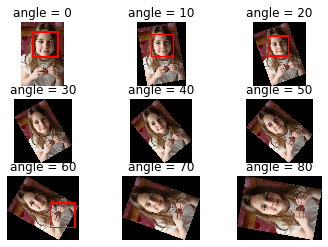

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

#!
#! Create a detector by specifying a cascade file.
#!
cascade_file = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(cascade_file)
#!
#!Read the target image and convert it to grayscale.
#!
img = cv2.imread("girl.jpg")

#! [ Perform face detection and mark. ]
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #! Perform face recognition.
    face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
    #! Mark the recognized part.
    for (x, y, w, h) in face_list:
        print("Face coordinates = ", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x + w, y + h), red, thickness = 20)

#!
#! Verification for each angle.
#!
for i in range(0, 9):
    angle = i * 10
    print("----" + str(angle) + "------")
    img_r = ndimage.rotate(img, angle)
    #! Perform face detection and mark.
    face_detect(img_r)
    #! Draw multiple graphs.
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle = " + str(angle))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
    
plt.show()